In [21]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
import scipy.stats as stats


1. Create a random matric A (nxn) with uniformly distributed entries n = 2000,4000,6000,8000,10000. record the cpu time needed as a function of n when each of the following methods is used:
* Slow method: min(sum(A^5, 2))
* Fast method: min(A*(A*(A*(A*(sum(A,2))))))

* Plot the CUP times of the two methods against n as two separate curves in the same figure. Make sure to use distinct colors and symbols for the two curves, add legend, label everything, and use proper font size to increase the quality of your plot.


In [22]:
#uniform nxn matrix [0,1]
from time import process_time
def matrix(n):
    A = np.random.uniform(0,1,(n,n))
    return A

def sum_matrix(A):
    t_start = process_time()
    sum = np.min(np.sum(np.linalg.matrix_power(A, 5),axis=1))
    t_end = process_time()
    return sum, t_end-t_start

def fast_sum(A):
    t_start = process_time()
    sum = np.min(A @ (A @ (A @ (A @ np.sum(A, axis=1)))))
    t_end = process_time()
    return sum, t_end-t_start




* 1a. Method 1: Slow method: min(sum(A^5, 2))

In [23]:
#Create a dataframe to store the values that are computed using method 1
#n = 2000, 4000, 6000, 8000, 10000
#value, time
n = [2000, 4000, 6000, 8000, 10000]
value = []
time = []
for i in n:
    A = matrix(i)
    sum, t = sum_matrix(A)
    value.append(sum)
    time.append(t)

    



* 1b. Method 2: Fast Method

In [24]:
value_2 = []
time_2 = []
for i in n:
    A = matrix(i)
    sum_2, t2 = fast_sum(A)
    value_2.append(sum_2)
    time_2.append(t2)
print("1a. sum of A^5 using the slow method:\n", value)
print("1a. cpu time using slow method:\n", time)
print("1b. sum of A^5 using the fast method:\n", value_2)
print("1b. cpu time using fast method:\n", time_2)

1a. sum of A^5 using the slow method:
 [955516272506976.2, 3.109328786918187e+16, 2.3650778351561632e+17, 9.944821944227566e+17, 3.0510185941155686e+18]
1a. cpu time using slow method:
 [3.096437000000037, 22.606043999999997, 79.37555599999996, 188.096042, 365.09555799999987]
1b. sum of A^5 using the fast method:
 [955153119504485.6, 3.105759275054136e+16, 2.3489632655916806e+17, 9.943672001772846e+17, 3.063425421944245e+18]
1b. cpu time using fast method:
 [0.01245399999993424, 0.06673999999998159, 0.08548300000006748, 0.15204799999992247, 0.23104200000011588]


In [25]:
#Create a dataframe to store the values that are computed using methods
method_1 = pd.DataFrame({"n":n, "slow_sum":value, "slow_time":time})
method_2 = pd.DataFrame({"n":n, "fast_sum":value_2, "fast_time":time_2})
method_1.head()


,n,slow_sum,slow_time
0,2000,9.555163e+14,3.096437
1,4000,3.109329e+16,22.606044
2,6000,2.365078e+17,79.375556
3,8000,9.944822e+17,188.096042
4,10000,3.051019e+18,365.095558


In [26]:
#method2
method_2.head()

,n,fast_sum,fast_time
0,2000,9.551531e+14,0.012454
1,4000,3.105759e+16,0.066740
2,6000,2.348963e+17,0.085483
3,8000,9.943672e+17,0.152048
4,10000,3.063425e+18,0.231042


In [27]:
#plot both methods on the same graph and compare the time for each n value
import plotly.express as px
#join the two dataframes on the n column
df = pd.merge(method_1, method_2, on='n')
df.head()

,n,slow_sum,slow_time,fast_sum,fast_time
0,2000,9.555163e+14,3.096437,9.551531e+14,0.012454
1,4000,3.109329e+16,22.606044,3.105759e+16,0.066740
2,6000,2.365078e+17,79.375556,2.348963e+17,0.085483
3,8000,9.944822e+17,188.096042,9.943672e+17,0.152048
4,10000,3.051019e+18,365.095558,3.063425e+18,0.231042


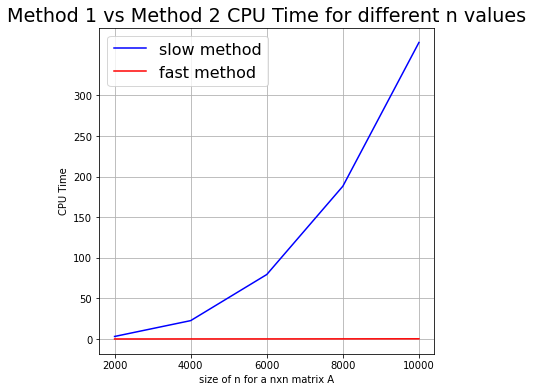

In [28]:
#plot both methods on the same graph and compare the time for each n value
plt.figure(figsize=(6,6))
plt.plot(df['n'], df['slow_time'], color = 'blue', label='slow method')
plt.plot(df['n'], df['fast_time'],color = 'red', label='fast method')
plt.rcParams.update({'font.size': 16})
plt.yticks(np.arange(0, 350, step=50))
plt.xticks(np.arange(2000, 12000, step=2000))
plt.xlabel("size of n for a nxn matrix A")
plt.ylabel("CPU Time")
plt.title("Method 1 vs Method 2 CPU Time for different n values")
plt.legend()
plt.grid(True)
plt.show()

# 2.Penguin Dataset

In [29]:
#read the data from the csv file
penguin_Iter = pd.read_csv("/Users/calebsiow/Documents/MATH 185/HW/Python/HW4/penguins_lter.csv")
penguin_size = pd.read_csv("/Users/calebsiow/Documents/MATH 185/HW/Python/HW4/penguins_size.csv")


In [30]:
#remove the rows with missing values
penguin_size.dropna(inplace=True)

In [31]:
penguin_size.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [32]:
categorical_columns = []
for col in penguin_size.columns:
    if penguin_size[col].dtype == "object":
        categorical_columns.append(col)
numerical_columns = penguin_size.columns.difference(categorical_columns)

In [33]:
#plot the distribution of different species on different islands in the same graph using a barplot
import plotly.express as px
from plotly.offline import plot
from plotly.subplots import make_subplots
from plotly.graph_objs import *
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.io import write_image
#Distribution of Species 
species_bar = px.bar(penguin_size, x="species", color="species", barmode="group", width = 600, height = 600, title = "Distribution of Species", template = "plotly_dark", color_discrete_sequence = px.colors.sequential.Peach)
species_bar.update_layout(title_x = 0.5, title_y = 0.9, title_font_size = 20, xaxis_title_font_size = 20, yaxis_title_font_size = 20, xaxis_title_text = "Species", yaxis_title_text = "Number of Species", xaxis_tickfont_size = 15, yaxis_tickfont_size = 15, font_size = 15)
species_bar.update_layout(bargap=0.05, bargroupgap=0.05)
species_bar.show()



In [34]:
#Distribution of Island
import plotly.graph_objects as go 
island_bar = px.bar(penguin_size, x="island", color="island", barmode="group", width = 600, height = 600, title = "Distribution of Island", template = "plotly_dark", color_discrete_sequence = px.colors.sequential.Tealgrn)
island_bar.update_traces(marker_line_color='black', marker_line_width=1.5, opacity=0.6)
island_bar.update_layout(title_x = 0.5, title_y = 0.9, title_font_size = 20, xaxis_title_font_size = 20, yaxis_title_font_size = 20, xaxis_title_text = "Island", yaxis_title_text = "Number of Islands", xaxis_tickfont_size = 15, yaxis_tickfont_size = 15, font_size = 15)
island_bar.update_geos(fitbounds="locations", visible=False)
island_bar.show()


# 2b. What is the relationship between species and island? Display a stacked bar plot and comment on it.

In [35]:
#Stacked Bar Plot for distribution of species and island

stacked = px.bar(penguin_size, x="island", y="species", color="species", barmode="stack", width = 600, height = 600, title = "Distribution of Species and Island", template = "plotly_dark", color_discrete_sequence = px.colors.sequential.Purp)
#display each island on the y axis
stacked.update_layout(title_x = 0.5, title_y = 0.9, title_font_size = 20, xaxis_title_font_size = 20, yaxis_title_font_size = 20, xaxis_title_text = "Species", yaxis_title_text = "Island", xaxis_tickfont_size = 15, yaxis_tickfont_size = 15, font_size = 15)
#add island names to the y axis
stacked.add_trace(go.Scatter(x=[], y=[], mode='text', text=penguin_size['island'], textposition='middle right', textfont=dict(size=15, color='black')))
#Add a legend for islands
stacked.update_geos(fitbounds="locations", visible=False)
stacked.update_yaxes(showgrid=True, gridwidth=1, gridcolor='#bdbdbd')
stacked.show()


# 2c. What is the relationship between flipper_length and body_mass 

In [36]:
#Relationship between flipper length and body mass
penguin_Iter.head()


,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [38]:
penguin_Iter.shape

(344, 17)

In [123]:
#scatter plot of flipper length and body mass
#scatter plot of flipper length and body mass
import plotly.express as px
plot = px.scatter(penguin_Iter, x="Flipper Length (mm)", y="Body Mass (g)", width = 1000, height = 1000, title = "Relationship between flipper length and body mass", template = "plotly_dark", color_discrete_sequence=px.colors.sequential.Reds)
plot.update_layout(title_x = 0.5, title_y = 0.9, title_font_size = 20, xaxis_title_font_size = 20, yaxis_title_font_size = 20, xaxis_title_text = "Flipper Length (mm)", yaxis_title_text = "Body Mass (g)", xaxis_tickfont_size = 15, yaxis_tickfont_size = 15, font_size = 15)
plot.show()


# 2D. Add Species information to the scatterplot

In [122]:
#2d scatter plot with groups of penguins given species 
#columns to plot: species, flipper length, body mass
plot_2 = px.scatter(penguin_Iter, x="Flipper Length (mm)", y="Body Mass (g)", color="Species", width = 1000, height = 1000, title = "Relationship between flipper length and body mass", template = "plotly_dark", color_continuous_midpoint= 0, color_continuous_scale=px.colors.sequential.Reds)
plot_2.show()



# 2E. Plot culmen_length against culmen_depth

In [121]:
#Plot culmen_length against culmen_depth with species information 
plot_3 = px.scatter(penguin_Iter, x="Culmen Depth (mm)", y="Culmen Length (mm)", color="Species", width = 1000, height = 1000, title = "Relationship between culmen depth and culmen length", template = "plotly_dark", color_continuous_midpoint= 0, color_continuous_scale=px.colors.sequential.Sunset)
plot_3.show()

# 2f. Add flipper length to the scatter plot in part e to make a 3d scatter plot

In [131]:
#plot flipper length, culmen depth, culmen length with species information
#3d scatter plot
plot_4 = px.scatter_3d(penguin_Iter, x="Flipper Length (mm)", y="Culmen Depth (mm)", z="Culmen Length (mm)", color="Species", width = 1000, height = 1000, title = "3D Scatter Plot:  flipper length vs culmen depth vs and culmen length", template = "plotly_dark", color_discrete_sequence = px.colors.sequential.Sunset)
#decrease size of the text 
plot_4.update_layout(margin = dict(l=0, r=0, b=0, t=100))
#reduce legend size
plot_4.update_layout(legend=dict(x=0, y=0.0), legend_orientation="h", legend_font_size=15)
plot_4.show()
